In [2]:
# Import

import pandas as pd
import numpy as np
import nltk
import spacy
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


Load the data using pandas.

In [3]:
data = pd.read_csv("twcs/twcs.csv")
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


Quick data information

In [4]:
print("Info: ", data.info())
print("Columns: ", data.columns)
print("Data types: ", data.dtypes)
print("Null values: ", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB
Info:  None
Columns:  Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')
Data types:  tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object
Null values:  tweet_id              

Which brands have replied the most?

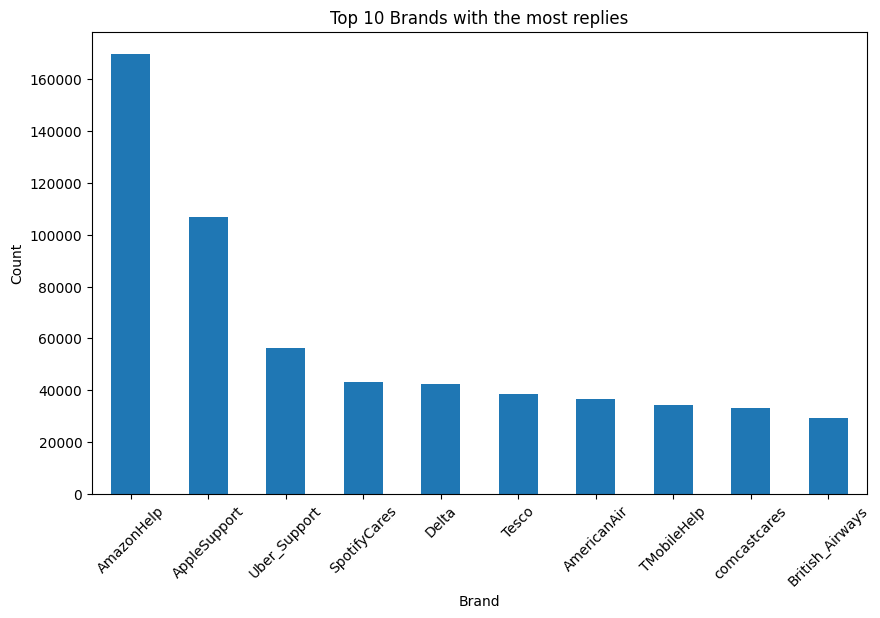

In [5]:
top_brands = data['author_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands with the most replies')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text analysis on tweets contents

In [23]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omarw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\omarw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omarw\AppData\Roaming\nltk_data...


True

In [7]:
 # Lowercase the tweets, tokenize and remove stop words
stop_words = set(stopwords.words('english'))
tweets = data['text'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(tweets)
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

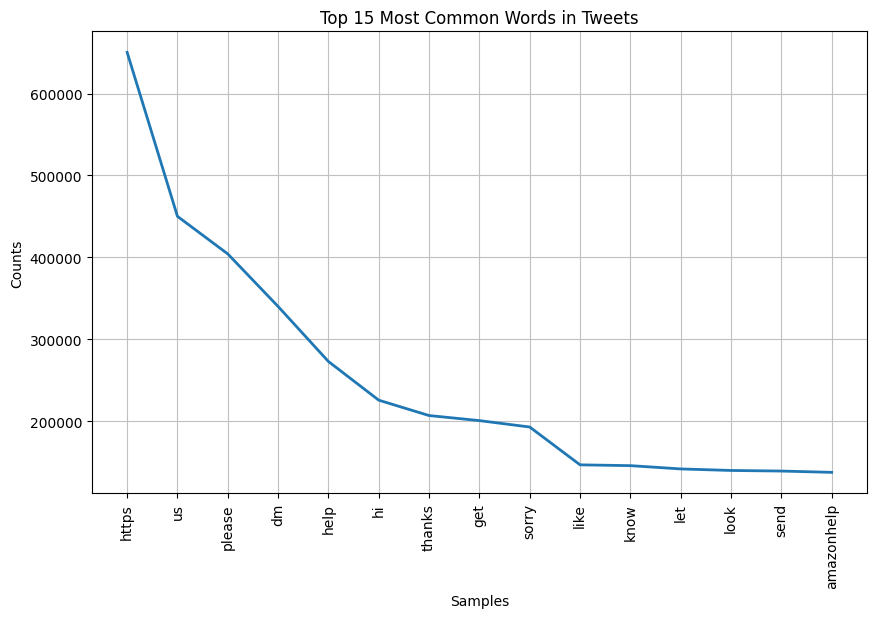

<Axes: title={'center': 'Top 15 Most Common Words in Tweets'}, xlabel='Samples', ylabel='Counts'>

In [8]:
# Calculate word frequencies
fdist = FreqDist(filtered_tokens)
top_words = fdist.most_common(40)

# Plot word frequency distribution
plt.figure(figsize=(10, 6))
fdist.plot(15, title='Top 15 Most Common Words in Tweets')

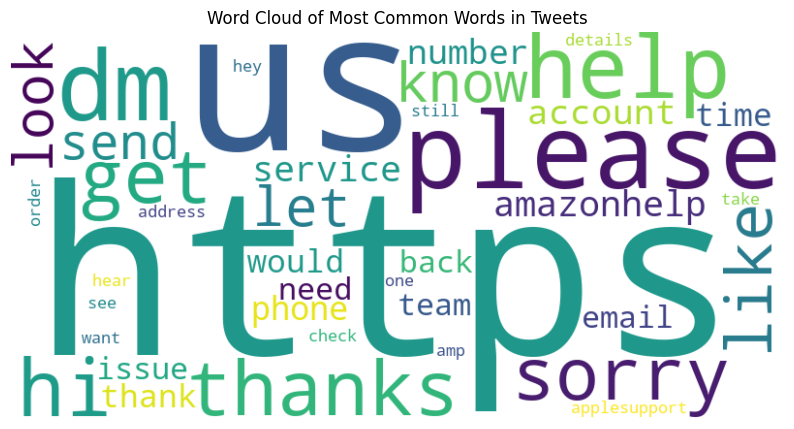

In [9]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Tweets')
plt.show()

In [10]:
# Average tweet lengths
tweet_lengths = data['text'].str.len()
average_tweet_length = tweet_lengths.mean()
print("Average tweet length:", int(average_tweet_length))

Average tweet length: 113


In [11]:
# Average word length in the tweet
mean = np.mean(list(map(lambda x : len(x), filtered_tokens)))
print(mean)

5.62029442213919


In [25]:
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()

# Distinct vocabulary
lemmas = map(wl.lemmatize, filtered_tokens)
distinct_vocabulary = set(
    filter(
        str.isascii, lemmas
        )
    )
print("Distinct Words: ", len(distinct_vocabulary))

Distinct Words:  994259


In [12]:
print(filtered_tokens[:20])

['115712', 'understand', 'would', 'like', 'assist', 'would', 'need', 'get', 'private', 'secured', 'link', 'assist', 'sprintcare', 'propose', 'sprintcare', 'sent', 'several', 'private', 'messages', 'one']


In [14]:
# Top N-grams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_ngrams = get_top_ngram(data['text'], 2)
print(top_ngrams)

[('https co', 654255), ('we can', 158487), ('for the', 148488), ('we re', 120560), ('to help', 118522), ('can you', 117498), ('we ll', 113283), ('if you', 111563), ('thank you', 105262), ('dm us', 102450)]


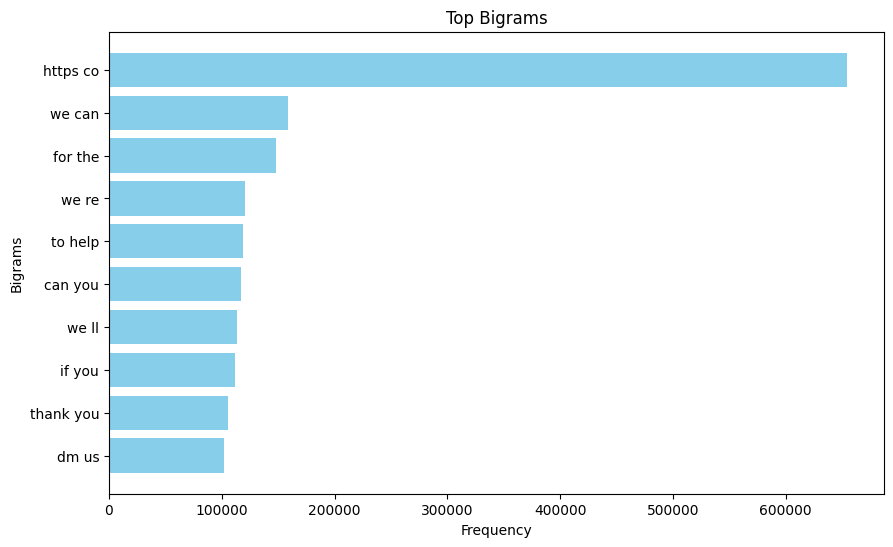

In [16]:
# Extracting n-grams and their frequencies
n_gram_labels = [ngram[0] for ngram in top_ngrams[:10]]
frequencies = [ngram[1] for ngram in top_ngrams[:10]]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.barh(n_gram_labels, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top Bigrams')
plt.gca().invert_yaxis()
plt.show()

<BarContainer object of 3 artists>

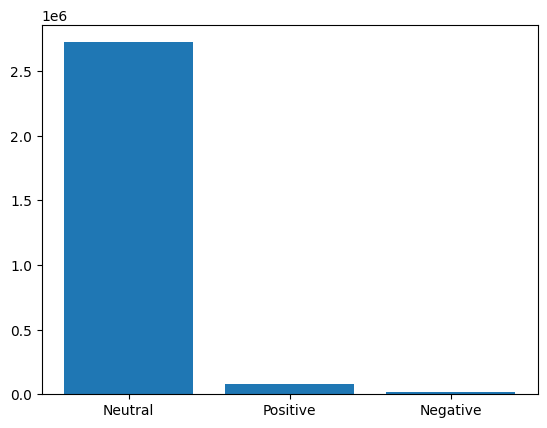

In [18]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    ss = sid.polarity_scores(sent)
    return np.argmax(list(ss.values())[:-1])

data['sentiment'] = data['text'].map(lambda x: get_vader_score(x))
sentiment = data['sentiment'].replace({0:'Negative',1:'Neutral',2:'Positive'})

plt.bar(sentiment.value_counts().index,
        sentiment.value_counts())